**Submitted By,** <br> 
Name: Anshara Chowdhury <br>
ID: 2021768 <br>
Name: Fahim Shahriar Eram <br>
ID: 2022523

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates
import plotly.express as px
from mlxtend.preprocessing import MeanCenterer

In [2]:
df = pd.read_csv("iris.data", header=None)
new_df = df.drop(columns=[2, 3])
new_df.rename(columns = {0:'Sepal-Length', 1:'Sepal-Width', 4:'Class'}, inplace = True)

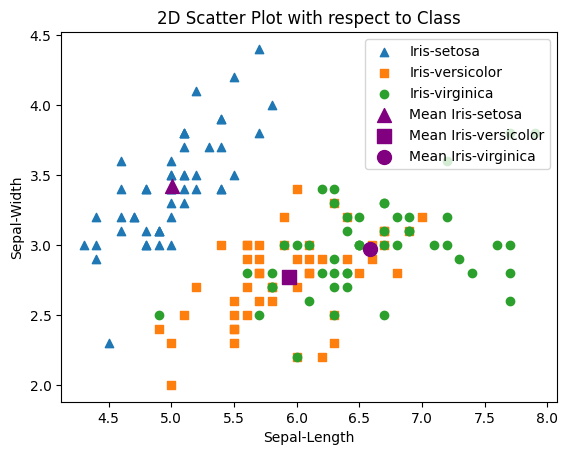

In [3]:
class_names = new_df['Class'].unique()
mean_data = new_df.groupby('Class').mean()
marker_shapes = ['^', 's', 'o']

for i, class_name in enumerate(class_names):
    class_data = new_df[new_df['Class'] == class_name]
    plt.scatter(class_data['Sepal-Length'], class_data['Sepal-Width'], marker=marker_shapes[i], label=class_name)

for i, class_type in enumerate(mean_data.index):
    mean_point = mean_data.loc[class_type]
    plt.scatter(mean_point['Sepal-Length'], mean_point['Sepal-Width'], marker=marker_shapes[i], c='purple', s=100, label=f'Mean {class_type}')

plt.xlabel('Sepal-Length')
plt.ylabel('Sepal-Width')
plt.title('2D Scatter Plot with respect to Class')
plt.legend()
plt.show()

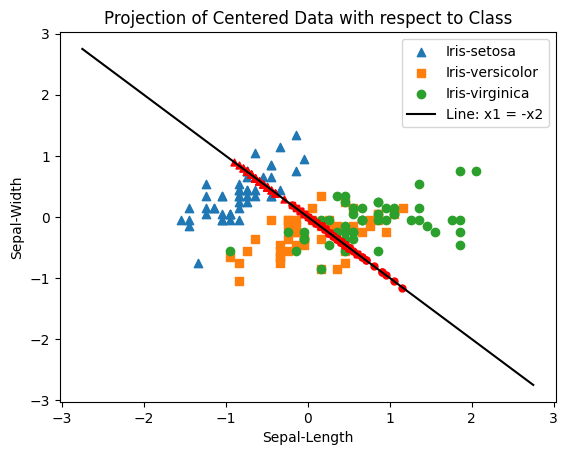

In [4]:
mean_sepal_length = new_df['Sepal-Length'].mean()
mean_sepal_width = new_df['Sepal-Width'].mean()

centered_sepal_length = new_df['Sepal-Length'] - mean_sepal_length
centered_sepal_width = new_df['Sepal-Width'] - mean_sepal_width
centered_data = pd.DataFrame({'Centered Sepal-Length': centered_sepal_length, 'Centered Sepal-Width': centered_sepal_width, 'Class': new_df['Class']})

for i, class_name in enumerate(class_names):
    class_data = centered_data[centered_data['Class'] == class_name]
    plt.scatter(class_data['Centered Sepal-Length'], class_data['Centered Sepal-Width'], marker=marker_shapes[i], label=class_name)

x = np.linspace(-2.75, 2.75, 50)
y = -x
plt.plot(x, y, color='black', label='Line: x1 = -x2')

iris_setosa_data = centered_data.loc[centered_data['Class'] == 'Iris-setosa', ['Centered Sepal-Length', 'Centered Sepal-Width']].to_numpy()
iris_versicolor_data = centered_data.loc[centered_data['Class'] == 'Iris-versicolor', ['Centered Sepal-Length', 'Centered Sepal-Width']].to_numpy()
iris_virginica_data = centered_data.loc[centered_data['Class'] == 'Iris-virginica', ['Centered Sepal-Length', 'Centered Sepal-Width']].to_numpy()

myLine = np.array([-2.75, 2.75])
myLine = myLine.reshape(2, 1)

val1 = np.dot(myLine.T, myLine)
val2 = np.dot(iris_setosa_data, myLine)/val1
val3 = np.dot(iris_versicolor_data, myLine)/val1
val4 = np.dot(iris_virginica_data, myLine)/val1
val5 = np.dot(val2, myLine.T)
val6 = np.dot(val3, myLine.T)
val7 = np.dot(val4, myLine.T)

x11 = val5[:, 0]  
x12 = val5[:, 1] 
x21 = val6[:, 0] 
x22 = val6[:, 1] 
x31 = val7[:, 0] 
x32 = val7[:, 1] 

plt.scatter(x11, x12, marker='^', s=25, color='red')
plt.scatter(x21, x22, marker='s', s=25, color='red')
plt.scatter(x31, x32, marker='o', s=25, color='red')

plt.xlabel('Sepal-Length')
plt.ylabel('Sepal-Width')
plt.title('Projection of Centered Data with respect to Class')
plt.legend()
plt.show()

In [5]:
another_df = df.drop(columns=[3])
another_df.rename(columns = {0:'Sepal-Length', 1:'Sepal-Width', 2:'Petal-Length', 4:'Class'}, inplace = True)

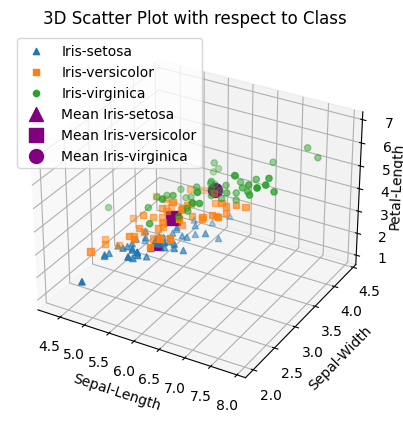

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
mean_data = another_df.groupby('Class').mean()
classes = another_df['Class'].unique()
marker_shapes = ['^', 's', 'o']

for i, class_type in enumerate(classes):
    class_data = another_df[another_df['Class'] == class_type]
    ax.scatter(class_data['Sepal-Length'], class_data['Sepal-Width'], class_data['Petal-Length'], marker=marker_shapes[i], label=class_type)

for i, class_type in enumerate(mean_data.index):
    mean_point = mean_data.loc[class_type]
    ax.scatter(mean_point['Sepal-Length'], mean_point['Sepal-Width'], mean_point['Petal-Length'], marker=marker_shapes[i], c='purple', s=100, label=f'Mean {class_type}')

ax.set_xlabel('Sepal-Length')
ax.set_ylabel('Sepal-Width')
ax.set_zlabel('Petal-Length', labelpad = -4.5)
ax.set_title('3D Scatter Plot with respect to Class')
ax.legend()
plt.show()

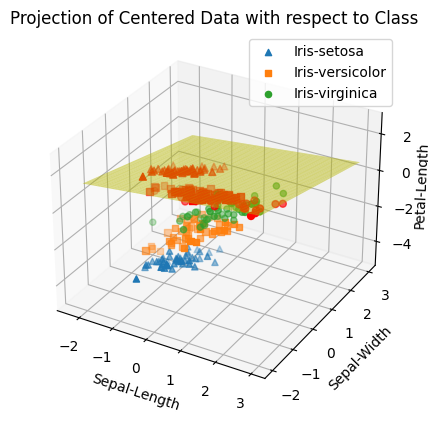

In [7]:
# Plotting of basic 3D scatterplot
mean_sepal_length = another_df['Sepal-Length'].mean()
mean_sepal_width = another_df['Sepal-Width'].mean()
mean_petal_length = another_df['Sepal-Length'].mean()

centered_sepal_length = another_df['Sepal-Length'] - mean_sepal_length
centered_sepal_width = another_df['Sepal-Width'] - mean_sepal_width
centered_petal_length = another_df['Petal-Length'] - mean_petal_length
centered_data = pd.DataFrame({'Centered Sepal-Length': centered_sepal_length, 'Centered Sepal-Width': centered_sepal_width, 'Centered Petal-Length': centered_petal_length, 'Class': another_df['Class']})

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, class_type in enumerate(classes):
    class_data = centered_data[centered_data['Class'] == class_type]
    ax.scatter(class_data['Centered Sepal-Length'], class_data['Centered Sepal-Width'], class_data['Centered Petal-Length'], marker=marker_shapes[i], label=class_type)

# Plotting of plane
v1 = np.array([1, -2, 1])
v2 = np.array([2, 1, 0])
normal_vector = np.cross(v1, v2)
A, B, C = normal_vector
point_on_plane = np.array([1, 1, 1])
D = np.dot(normal_vector, point_on_plane)
x = np.linspace(-2, 3, 100)
y = np.linspace(-2, 3, 100)
X, Y = np.meshgrid(x, y)
Z = (D - A*X - B*Y) / C
ax.plot_surface(X, Y, Z, color='yellow', alpha=0.5)

# Plotting of projected points
iris_setosa_data = centered_data.loc[centered_data['Class'] == 'Iris-setosa', ['Centered Sepal-Length', 'Centered Sepal-Width', 'Centered Petal-Length']].to_numpy()
iris_versicolor_data = centered_data.loc[centered_data['Class'] == 'Iris-versicolor', ['Centered Sepal-Length', 'Centered Sepal-Width', 'Centered Petal-Length']].to_numpy()
iris_virginica_data = centered_data.loc[centered_data['Class'] == 'Iris-virginica', ['Centered Sepal-Length', 'Centered Sepal-Width', 'Centered Petal-Length']].to_numpy()

v1 = v1.reshape(3, 1)
v2 = v2.reshape(3, 1)
v1_lenght = np.dot(v1.T, v1)
v2_lenght = np.dot(v2.T, v2)

data11 = np.dot(iris_setosa_data, v1)/v1_lenght
data12 = np.dot(iris_setosa_data, v2)/v2_lenght
data21 = np.dot(iris_versicolor_data, v1)/v1_lenght
data22 = np.dot(iris_versicolor_data, v2)/v2_lenght
data31 = np.dot(iris_virginica_data, v1)/v1_lenght
data32 = np.dot(iris_virginica_data, v2)/v2_lenght

projected1 = np.add(np.dot(data11, v1.T), np.dot(data12, v2.T))
projected2 = np.add(np.dot(data21, v1.T), np.dot(data22, v2.T))
projected3 = np.add(np.dot(data31, v1.T), np.dot(data32, v2.T))

x11 = projected1[:, 0]
x12 = projected1[:, 1]
x13 = projected1[:, 2]
x21 = projected2[:, 0]
x22 = projected2[:, 1]
x23 = projected2[:, 2]
x31 = projected3[:, 0]
x32 = projected3[:, 1]
x33 = projected3[:, 2]

ax.scatter(x11, x12, x13, marker='^', s=25, color='red')
ax.scatter(x21, x22, x23, marker='s', s=25, color='red')
ax.scatter(x31, x32, x33, marker='o', s=25, color='red')

ax.set_xlabel('Sepal-Length')
ax.set_ylabel('Sepal-Width')
ax.set_zlabel('Petal-Length', labelpad = -2)
ax.set_title('Projection of Centered Data with respect to Class')
ax.legend()
plt.show()

In [8]:
mydf = pd.read_csv("magic04.data", header=None)
magic_data = pd.DataFrame.to_numpy(mydf.drop(columns=[10]))

In [9]:
myMean = np.mean(magic_data, axis = 0)
myMean = myMean.reshape(10,1)
print(myMean)

[[ 53.25015393]
 [ 22.18096622]
 [  2.82501696]
 [  0.38032707]
 [  0.21465713]
 [ -4.33174516]
 [ 10.54554482]
 [  0.24972596]
 [ 27.64570668]
 [193.81802647]]


In [10]:
column_mean = myMean *  np.ones((1,magic_data.shape[0]))
column_mean = column_mean.T
centered_data = magic_data - column_mean
covariance1 = np.dot(centered_data.T, centered_data)/magic_data.shape[0]
print(covariance1)

[[ 1.79468657e+03  5.98832056e+02  1.40634899e+01 -4.88673783e+00
  -2.80023307e+00 -9.24385500e+02 -2.58713552e+02  1.18133866e+01
  -9.70630726e+00  1.32479447e+03]
 [ 5.98832056e+02  3.36560086e+02  6.22077467e+00 -2.04502933e+00
  -1.17816446e+00 -2.89957100e+02 -1.64885064e+02  1.51852884e+01
   3.16350305e+01  4.61761921e+02]
 [ 1.40634899e+01  6.22077467e+00  2.23337740e-01 -7.35072146e-02
  -4.22410108e-02 -4.47284297e+00  2.29341395e+00  1.52113339e-01
  -2.30280376e+00  1.54346558e+01]
 [-4.88673783e+00 -2.04502933e+00 -7.35072146e-02  3.34188897e-02
   1.97252425e-02  1.21513100e+00 -1.13646775e+00 -4.30002400e-02
   1.12267849e+00 -4.48542469e+00]
 [-2.80023307e+00 -1.17816446e+00 -4.22410108e-02  1.97252425e-02
   1.22119946e-02  6.55298229e-01 -6.69353952e-01 -2.52377277e-02
   6.62872326e-01 -2.51566226e+00]
 [-9.24385500e+02 -2.89957100e+02 -4.47284297e+00  1.21513100e+00
   6.55298229e-01  3.50517348e+03  8.27439241e+02  3.14776536e+00
  -8.60618247e+01 -9.14642631e+02

In [11]:
sum = 0
for x in range(magic_data.shape[0]):
    fixing = centered_data[x].reshape(magic_data.shape[1], 1)
    outer_product = np.dot(fixing,fixing.T)
    sum = np.add(sum, outer_product)
print(sum)
print(sum.shape)
covariance2 = np.divide(sum, magic_data.shape[0])
print(covariance2)

[[ 3.41349386e+07  1.13897857e+07  2.67487578e+05 -9.29457536e+04
  -5.32604330e+04 -1.75818122e+07 -4.92073175e+06  2.24690613e+05
  -1.84613964e+05  2.51975909e+07]
 [ 1.13897857e+07  6.40137283e+06  1.18319134e+05 -3.88964578e+04
  -2.24086881e+04 -5.51498405e+06 -3.13611393e+06  2.88824186e+05
   6.01698280e+05  8.78271175e+06]
 [ 2.67487578e+05  1.18319134e+05  4.24788381e+03 -1.39810722e+03
  -8.03424025e+02 -8.50734733e+04  4.36207334e+04  2.89319571e+03
  -4.37993275e+04  2.93567153e+05]
 [-9.29457536e+04 -3.88964578e+04 -1.39810722e+03  6.35627281e+02
   3.75174113e+02  2.31117917e+04 -2.16156167e+04 -8.17864565e+02
   2.13533448e+04 -8.53127777e+04]
 [-5.32604330e+04 -2.24086881e+04 -8.03424025e+02  3.75174113e+02
   2.32272137e+02  1.24637723e+04 -1.27311122e+04 -4.80021581e+02
   1.26078316e+04 -4.78478962e+04]
 [-1.75818122e+07 -5.51498405e+06 -8.50734733e+04  2.31117917e+04
   1.24637723e+04  6.66683995e+07  1.57378944e+07  5.98704971e+04
  -1.63689591e+06 -1.73965028e+07

0.77 indicates a relatively high degree of correlation between the two attributes


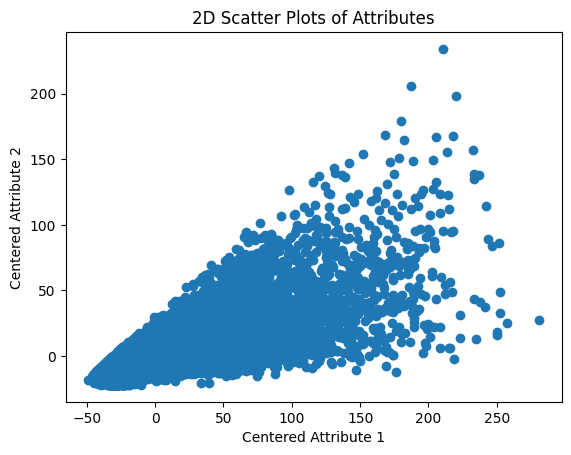

In [12]:
attribute1 = centered_data[:, 0]
attribute2 = centered_data[:, 1]
attribute1 = attribute1.reshape(magic_data.shape[0], 1)
attribute2 = attribute2.reshape(magic_data.shape[0], 1)

part1 = np.divide(attribute1, np.sqrt(np.dot(attribute1.T, attribute1)))
part2 = np.divide(attribute2, np.sqrt(np.dot(attribute2.T, attribute2)))
cosTheta = np.dot(part1.T, part2)

val = round(float(cosTheta.item()), 2)
print(val, "indicates a relatively high degree of correlation between the two attributes")

plt.scatter(attribute1, attribute2, marker='o')
plt.xlabel('Centered Attribute 1')
plt.ylabel('Centered Attribute 2')
plt.title('2D Scatter Plots of Attributes')
plt.show()